<a href="https://colab.research.google.com/github/sshar180/Machine-Learning-/blob/main/Linear_and_Neural_Net_Classifier_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 2**


**Name: Shubham Sharma**

**SID: 862394567**

Question 1) (2 pts) Apply the normalization on the training and test data.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

import numpy as np
from keras.datasets import mnist

def load_data():
    """ LOading the data set"""
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    x_train = x_train.reshape(60000, 784)
    x_test = x_test.reshape(10000, 784)

    x_train = (x_train - np.mean(x_train)) / np.std(x_train)
    x_test = (x_test - np.mean(x_train)) / np.std(x_train)

    x_train = np.concatenate([x_train, np.ones((x_train.shape[0], 1))], axis=1)
    x_test = np.concatenate([x_test, np.ones((x_test.shape[0], 1))], axis=1)

    y_train = np.where(y_train <= 4, 0, 1)
    y_test = np.where(y_test <= 4, 0, 1)

    return x_train, y_train, x_test, y_test

Answer1) In the above code we load the MNIST dataset from keras and performs the following steps:

1) The data is reshaped from a 3D array of size (num_samples, 28, 28) to a 2D array of size (num_samples, 784) where each image is flattened into a 1D array.

2)The data is normalized by subtracting the mean and dividing by the standard deviation. This helps to improve the performance of the model.

3)  A column of ones is added to the data for the bias term. The bias term is a constant that is added to each neuron in the output layer.

4) The target variable is converted to a binary classification problem by setting the label 0 for digits less than or equal to 4, and 1 for digits greater than 4. This is done because the MNIST dataset contains 10 classes, but we only want to classify digits as either less than or equal to 4, or greater than 4

***Question 2) (2 pts) As a baseline, train a linear classifier yˆ = v
T x and quadratic loss. Report its test accuracy.***

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1: loss=59.0423, accuracy=49.8983
Epoch 2: loss=35.2870, accuracy=50.2183
Epoch 3: loss=25.2712, accuracy=51.4267
Epoch 4: loss=19.7829, accuracy=52.1983
Epoch 5: loss=16.1894, accuracy=52.2350
Epoch 6: loss=13.6906, accuracy=52.1650
Epoch 7: loss=11.8507, accuracy=52.8567
Epoch 8: loss=10.3164, accuracy=53.2133
Epoch 9: loss=9.1870, accuracy=53.8333
Epoch 10: loss=8.1783, accuracy=53.6633
Epoch 11: loss=7.3850, accuracy=53.8550
Epoch 12: loss=6.6924, accuracy=54.0500
Epoch 13: loss=6.1066, accuracy=54.4567
Epoch 14: loss=5.6113, accuracy=54.2583
Epoch 15: loss=5.1822, accuracy=54.7767
Epoch 16: loss=4.7991, accuracy=55.1967
Epoch 17: loss=4.4628, accuracy=55.6083
Epoch 18: loss=4.1699, accuracy=55.4017
Epoch 19: loss=3.9027, accuracy=55.5750
Epoch 20: loss=3.6859, accuracy=56.7367
Epoch 21: loss=3.4506, accuracy=56.7283
Epoch 22: loss=3.2754, accuracy=56.8883
Epoch 23: loss=3.0862, accuracy=57.1267
Epoch 24: loss=2

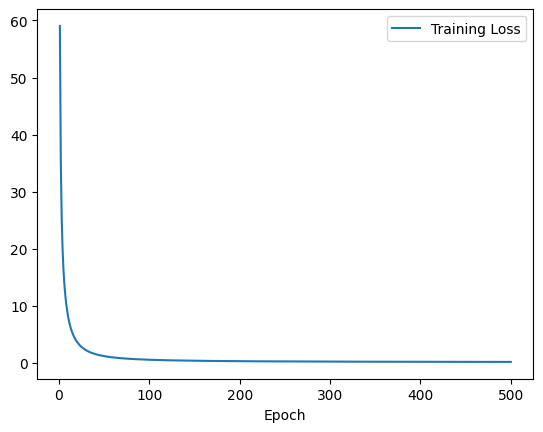

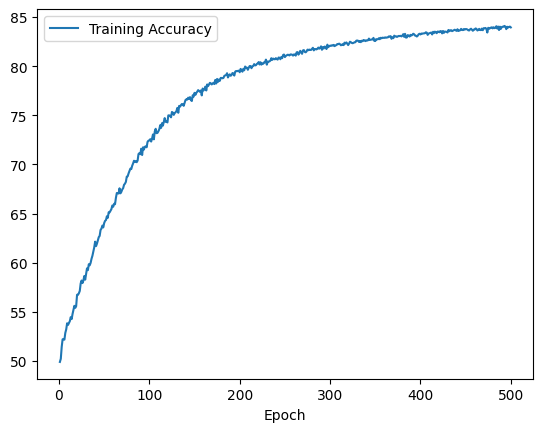

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

x_train, y_train, x_test, y_test = load_data()

""" Random weight initialization"""
W = np.random.randn(x_train.shape[1])

""" Setting up hyper-parameters """
lr = 0.001
batch_size = 100
n_epochs = 500
training_loss = []
training_accuracy = []

"""Implementing Batch stochastic gradient descent"""
for epoch in range(n_epochs):

    indices = np.random.permutation(x_train.shape[0])
    x_train = x_train[indices]
    y_train = y_train[indices]

    """Getting data in batches"""
    for i in range(0, x_train.shape[0], batch_size):
        x_batch = x_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]

        """Performing predictions """
        predicted_val = x_batch.dot(W)
        error = predicted_val - y_batch

        """Calculating Gradient"""
        gra = x_batch.T.dot(error) / batch_size

        """Gradient Update"""
        W -= lr * gra

    """Storing and calculating loss and accuracy"""
    predicted_val = x_train.dot(W)
    loss = np.mean((predicted_val - y_train) ** 2)

    accuracy = np.mean((predicted_val > 0.5) == y_train)


    training_loss.append(loss)
    training_accuracy.append(accuracy*100)


    print(f"Epoch {epoch+1}: loss={loss:.4f}, accuracy={accuracy*100:.4f}")

""" Accuracy Calculation"""
predicted_val = x_test.dot(W)
accuracy = np.mean((predicted_val > 0.5) == y_test)
print(f"Test accuracy: {accuracy:.4f}")

"""Ploting Training and Accuracy"""
plt.plot(range(1, n_epochs+1), training_loss, label="Training Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

plt.plot(range(1, n_epochs+1), training_accuracy, label="Training Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()


Answer2)
In the above linear classifier, we are getting a test accuracy of 82.22% after 500 epochs. Linear classifiers are simple models that perform well for data that can be separated by a linear decision boundary. However, they do not perform well for data that cannot be separated by a linear decision boundary.

We can observe that with each epoch, the loss is reducing and the accuracy is increasing. This is because the model is learning to better fit the data. However, it is important to note that the model may not be able to learn to fit the data perfectly, especially if the data is not linearly separable.

***Question 3) (7 pts) Train a neural network classifier with quadratic loss ℓ(y, f(x)) = (y − f(x))2
. Plot the progress
of the test and training accuracy (y-axis) as a function of the iteration counter t (x-axis)2
. Report the
final test accuracy for the following choices
• k=5
• k=40
• k=200
• Comment on the role of hidden units k on the ease of optimization and accuracy***


Training with k = 5
Iteration 0: Training accuracy 0.39566666666666667, Test accuracy 0.3824 and Training loss 0.4892526635997046
Iteration 100: Training Accuracy 0.4900833333333333, Test Accuracy 0.4861 and Training loss 0.23425192206130357
Iteration 200: Training Accuracy 0.49038333333333334, Test Accuracy 0.488 and Training loss 0.20541647540259222
Iteration 300: Training Accuracy 0.4909833333333333, Test Accuracy 0.4927 and Training loss 0.19230351444647473
Iteration 400: Training Accuracy 0.49475, Test Accuracy 0.5133 and Training loss 0.18127601984474986
Iteration 500: Training Accuracy 0.5045166666666666, Test Accuracy 0.5609 and Training loss 0.17082811808378537
Iteration 600: Training Accuracy 0.5174833333333333, Test Accuracy 0.617 and Training loss 0.16365201024812284
Iteration 700: Training Accuracy 0.5140666666666667, Test Accuracy 0.6173 and Training loss 0.15910407274984567
Iteration 800: Training Accuracy 0.5233, Test Accuracy 0.6577 and Training loss 0.153538007863777

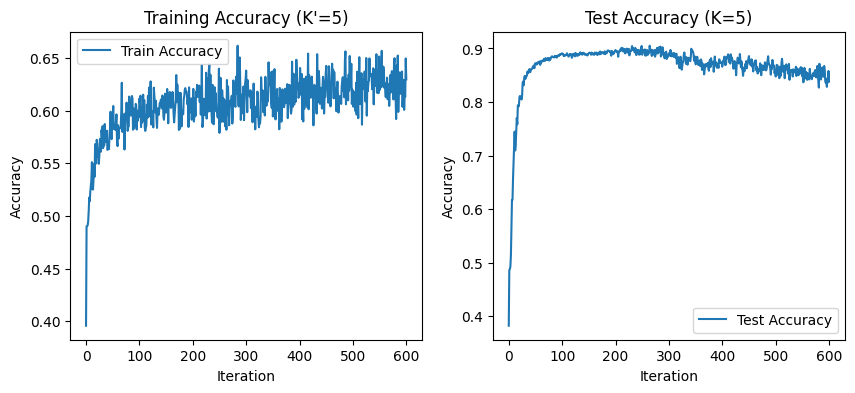


Training with k = 40
Iteration 0: Training accuracy 0.48941666666666667, Test accuracy 0.4864 and Training loss 0.48229410962038555
Iteration 100: Training Accuracy 0.49006666666666665, Test Accuracy 0.4861 and Training loss 0.28526575467479814
Iteration 200: Training Accuracy 0.49006666666666665, Test Accuracy 0.4861 and Training loss 0.2279295232907365
Iteration 300: Training Accuracy 0.4901333333333333, Test Accuracy 0.4863 and Training loss 0.21037833048181293
Iteration 400: Training Accuracy 0.49065, Test Accuracy 0.4894 and Training loss 0.20011831792999912
Iteration 500: Training Accuracy 0.4917666666666667, Test Accuracy 0.4944 and Training loss 0.19160721398880412
Iteration 600: Training Accuracy 0.49438333333333334, Test Accuracy 0.5064 and Training loss 0.18488034241022
Iteration 700: Training Accuracy 0.49546666666666667, Test Accuracy 0.513 and Training loss 0.17895969783883675
Iteration 800: Training Accuracy 0.49833333333333335, Test Accuracy 0.5268 and Training loss 0.

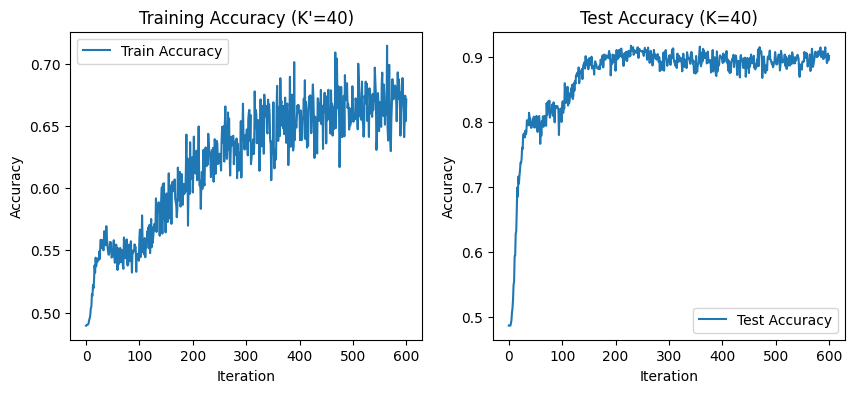


Training with k = 200
Iteration 0: Training accuracy 0.48788333333333334, Test accuracy 0.5077 and Training loss 0.49081725086748423
Iteration 100: Training Accuracy 0.49006666666666665, Test Accuracy 0.4861 and Training loss 0.45493688761002626
Iteration 200: Training Accuracy 0.49006666666666665, Test Accuracy 0.4861 and Training loss 0.3632783666956648
Iteration 300: Training Accuracy 0.49006666666666665, Test Accuracy 0.4861 and Training loss 0.2628135269370997
Iteration 400: Training Accuracy 0.49006666666666665, Test Accuracy 0.4861 and Training loss 0.22486719242079933
Iteration 500: Training Accuracy 0.49006666666666665, Test Accuracy 0.4861 and Training loss 0.2149432191442004
Iteration 600: Training Accuracy 0.49006666666666665, Test Accuracy 0.4861 and Training loss 0.20492285092592508
Iteration 700: Training Accuracy 0.49016666666666664, Test Accuracy 0.4866 and Training loss 0.19842861652507773
Iteration 800: Training Accuracy 0.4903666666666667, Test Accuracy 0.4881 and 

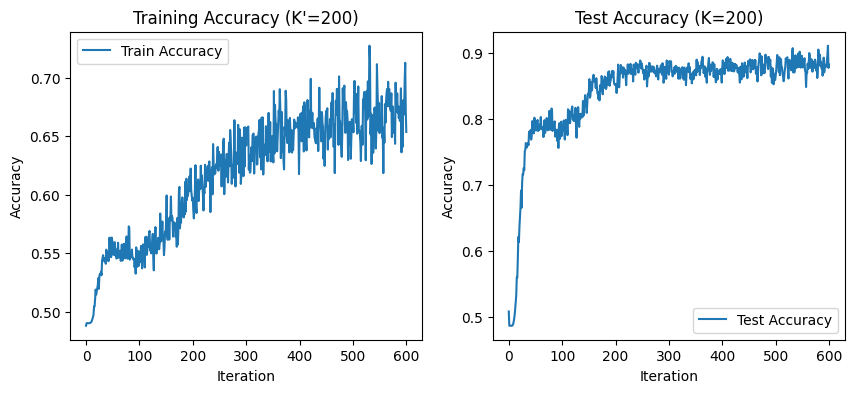

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

"""Relu Function"""
def relu(x):
    return np.maximum(x,0)

"""Feed Forward"""
def feed_forward(x, W, v):
    h= relu(np.dot(W,x))
    return np.dot(v.T,h)

"""Calculating Gradient"""
def get_gradients(x_b, y_b, W, v):
    gradient_v = np.zeros_like(v)
    gradient_W = np.zeros_like(W)

    for x, y in zip(x_b, y_b):
        h = relu(np.dot(W,x))
        f_x = np.dot(v.T,h)
        error = y - f_x
        gradient_v += -2*(error)*(h)
        gradient_W += -2*(error)*(np.outer(v * (h > 0), x))
    return gradient_v, gradient_W

def xavier_initialization(d, k):
    W =np.random.normal(0, 1/d, (k, d))
    v =np.random.normal(0, 1/k, k)
    return W, v


""" Updating Weights"""
def set_weights(W, v, gradient_W, gradient_v, lr, b_size):
    v =v -lr*(gradient_v / b_size)
    W = W -lr*(gradient_W / b_size)
    return W,v

def get_accuracyandloss(x, y, W, v):
    y_pred = np.array([feed_forward(i, W, v) for i in x])
    accuracy = np.mean((y_pred > 0) == y)
    loss = np.mean((y - y_pred) ** 2)
    return accuracy, loss

def train(x_train, y_train, x_test, y_test, k, epochs, b_size, lr, output_index):

    """Initalizing the weights"""
    d = x_train.shape[1]
    W, v = xavier_initialization(d, k)

    train_accuracy = []
    test_accuracy = []
    train_loss = []
    test_loss = []
    itr = 0
    """ Calculating initial accuracy"""
    train_acc, train_epoch_loss = get_accuracyandloss(x_train,y_train, W,v)
    test_acc, test_epoch_loss =get_accuracyandloss(x_test,y_test, W,v)

    print(f"Iteration {itr}: Training accuracy {train_acc}, Test accuracy {test_acc} and Training loss {train_epoch_loss}")
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)
    train_loss.append(train_epoch_loss)
    test_loss.append(test_epoch_loss)

    """Training Loop for Each epoch """
    for epoch in range(epochs):
        indices = np.random.permutation(x_train.shape[0])
        n = x_train.shape[0]
        """ Iterating Batch By Batch"""
        for t in range(0, n, b_size):

            """Getting Batch Data"""
            batch_indices = indices[t:t+b_size]
            x_b = x_train[batch_indices]
            y_b = y_train[batch_indices]

            """Calculating Gradient"""
            gradient_v, gradient_W = get_gradients(x_b, y_b, W, v)

            """Updating Weight"""
            W, v = set_weights(W, v, gradient_W, gradient_v, lr, b_size)

            itr += 1

            if itr % output_index == 0:
                """Ccalculating Accuracy and Loss"""
                train_acc, train_epoch_loss = get_accuracyandloss(x_train, y_train, W, v)
                test_acc, test_epoch_loss = get_accuracyandloss(x_test, y_test, W, v)

                print(f"Iteration {itr}: Training Accuracy {train_acc}, Test Accuracy {test_acc} and Training loss {train_epoch_loss}")
                train_accuracy.append(train_acc)
                test_accuracy.append(test_acc)
                train_loss.append(train_epoch_loss)
                test_loss.append(test_epoch_loss)

    return train_accuracy, test_accuracy, train_loss, test_loss, W, v

def plot_accuracy(train_acc, test_acc, k):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
    ax[0].plot(range(len(train_acc)), train_acc, label="Train Accuracy")
    ax[0].set_title(f"Training Accuracy (K'={k})")
    ax[0].set_xlabel("Iteration")
    ax[0].set_ylabel("Accuracy")
    ax[0].legend()
    ax[1].plot(range(len(test_acc)), test_acc, label="Test Accuracy")
    ax[1].set_title(f"Test Accuracy (K={k})")
    ax[1].set_xlabel("Iteration")
    ax[1].set_ylabel("Accuracy")
    ax[1].legend()
    plt.show()

def solution3():
    x_train, y_train, x_test, y_test = load_data()
    k_values = [5, 40, 200]
    learning_rate = 0.0005
    epochs = 10
    b_size = 10
    output_index = 100

    for k in k_values:
        print(f"\nTraining with k = {k}")
        train_accuracy, test_accuracy, train_loss, test_loss, W, v = train(x_train, y_train, x_test, y_test, k, epochs, b_size, learning_rate, output_index)

        print(f"Final test accuracy for k = {k}: {test_accuracy[-1]}")
        plot_accuracy(train_accuracy, test_accuracy, k)

solution3()


Asnwer3) The number of nodes in a neural network can have a significant impact on its accuracy. In general, more nodes will lead to higher accuracy, but it is important to note that there is a point of diminishing returns.

In the above output, we can see that the final test accuracy for K=5 is 83.82%, for K=40 is 90.14%, and for K=200 is 88.18%. This shows that there is a significant increase in accuracy from K=5 to K=40, but the accuracy from K=40 to K=200 remains same .

This is because the neural network has already learned most of the patterns in the data with 40 nodes. Adding more nodes does not significantly improve the accuracy of the model, but it does increase the training time.

It is important to note that the number of nodes that is optimal for a particular problem will vary depending on the complexity of the problem and the size of the dataset.

**Question 4) (7 pts) Train a neural network classifier with logistic loss, namely ℓ(y, f (x)) = −y log(σ(f (x))) − (1 −
y) log(1 − σ(f (x))) where σ(x) = 1/(1 + e−x) is the sigmoid function. Repeat step 3.**

In [ ]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt

""" Sigmoid Method """
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

""" Updating Weights"""
def set_weights(W, v, gradient_W, gradient_v, lr, b_size):
    v =v -lr*(gradient_v / b_size)
    W = W -lr*(gradient_W / b_size)
    return W,v

def get_accuracy_and_quadratic_loss(x, y, W, v):
    y_pred = np.array([feed_forward(i, W, v) for i in x])
    acc = np.mean((sigmoid(y_pred) > 0.5) == y)
    loss = np.mean(-y * np.log(sigmoid(y_pred)) - (1 - y) * np.log(1 - sigmoid(y_pred)))
    return acc, loss

"""Calculating Gradient"""
def get_gradients_quadratic_loss(x_b, y_b, W, v):
    gradient_v = np.zeros_like(v)
    gradient_W = np.zeros_like(W)
    for x, y in zip(x_b, y_b):
      h = relu(np.dot(W,x))
      f_x = np.dot(v.T,h)
      sigmoid_fx = sigmoid(f_x)
      error = y - sigmoid_fx
      gradient_v += -(error) * h
      gradient_W += -np.outer((error) * v * (h > 0), x)
    return gradient_v, gradient_W


def train_logistic_loss(x_train, y_train, x_test, y_test, k, epochs, b_size, lr, output_index2):
    """Initalizing the weights"""
    d = x_train.shape[1]
    W, v = xavier_initialization(d, k)

    train_accuracy = []
    test_accuracy = []
    train_loss = []
    test_loss = []
    itr = 0

    """ Calculating initial accuracy"""
    train_acc, train_epoch_loss = get_accuracy_and_quadratic_loss(x_train,y_train, W,v)
    test_acc, test_epoch_loss =get_accuracy_and_quadratic_loss(x_test,y_test, W,v)

    print(f"Iteration {itr}: Training accuracy {train_acc}, test accuracy {test_acc} and Training loss {train_epoch_loss}")
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)
    train_loss.append(train_epoch_loss)
    test_loss.append(test_epoch_loss)
    """Iterating For Each Epoch"""
    for epoch in range(epochs):
        indices = np.random.permutation(x_train.shape[0])

        for t in range(0, x_train.shape[0], b_size):
            batch_indices = indices[t:t+b_size]
            x_b = x_train[batch_indices]
            y_b = y_train[batch_indices]

            """Calculating Gradient"""
            gradient_v, gradient_W = get_gradients_quadratic_loss(x_b, y_b, W, v)
            """Updating Weight"""
            W, v = set_weights(W, v, gradient_W, gradient_v, lr, b_size)

            itr += 1

            """Printing Accuracy for each 100th iteration """
            if itr % output_index2 == 0:

              train_acc, train_epoch_loss = get_accuracy_and_quadratic_loss(x_train, y_train, W, v)
              test_acc, test_epoch_loss = get_accuracy_and_quadratic_loss(x_test, y_test, W, v)

              train_accuracy.append(train_acc)
              test_accuracy.append(test_acc)
              train_loss.append(train_epoch_loss)
              test_loss.append(test_epoch_loss)
              print(f"Iteration {itr}: Training accuracy {train_acc}, Test accuracy {test_acc} and Training loss {train_epoch_loss}")
    return train_accuracy, test_accuracy, train_loss, test_loss, W, v




Training with k = 5
Iteration 0: Training accuracy 0.5000333333333333, test accuracy 0.5122 and Training loss 0.6929641423103524
Iteration 100: Training accuracy 0.6840333333333334, Test accuracy 0.7064 and Training loss 0.6729062052294628
Iteration 200: Training accuracy 0.7390166666666667, Test accuracy 0.7534 and Training loss 0.6537632920927376
Iteration 300: Training accuracy 0.7351166666666666, Test accuracy 0.7492 and Training loss 0.6367012632959256


<ipython-input-17-197f18ed6cdc>:18: RuntimeWarning: divide by zero encountered in log
  loss = np.mean(-y * np.log(sigmoid(y_pred)) - (1 - y) * np.log(1 - sigmoid(y_pred)))
<ipython-input-17-197f18ed6cdc>:18: RuntimeWarning: invalid value encountered in multiply
  loss = np.mean(-y * np.log(sigmoid(y_pred)) - (1 - y) * np.log(1 - sigmoid(y_pred)))


Iteration 400: Training accuracy 0.7588, Test accuracy 0.7712 and Training loss 0.6211321239084209
Iteration 500: Training accuracy 0.7761833333333333, Test accuracy 0.7829 and Training loss 0.6077059765984615
Iteration 600: Training accuracy 0.7767833333333334, Test accuracy 0.7836 and Training loss 0.5948450084608864
Iteration 700: Training accuracy 0.7730333333333334, Test accuracy 0.7828 and Training loss 0.581535229029433
Iteration 800: Training accuracy 0.7759, Test accuracy 0.7841 and Training loss 0.5703507893335351
Iteration 900: Training accuracy 0.78045, Test accuracy 0.7867 and Training loss 0.5599389028229242
Iteration 1000: Training accuracy 0.78025, Test accuracy 0.7875 and Training loss 0.5499236499477838
Iteration 1100: Training accuracy 0.78445, Test accuracy 0.7878 and Training loss 0.5417384860917897
Iteration 1200: Training accuracy 0.7821833333333333, Test accuracy 0.7881 and Training loss 0.5314491526189846
Iteration 1300: Training accuracy 0.7827166666666666, Te

<ipython-input-17-197f18ed6cdc>:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Iteration 15700: Training accuracy 0.8627, Test accuracy 0.8568 and Training loss 0.3305657690340897
Iteration 15800: Training accuracy 0.8623666666666666, Test accuracy 0.8576 and Training loss 0.3301150947384395
Iteration 15900: Training accuracy 0.8626666666666667, Test accuracy 0.8608 and Training loss 0.3302260971512191
Iteration 16000: Training accuracy 0.8597333333333333, Test accuracy 0.8536 and Training loss 0.3296411383325774
Iteration 16100: Training accuracy 0.86335, Test accuracy 0.8588 and Training loss 0.329039805150133
Iteration 16200: Training accuracy 0.864, Test accuracy 0.8579 and Training loss 0.32865674464768246
Iteration 16300: Training accuracy 0.8636333333333334, Test accuracy 0.8572 and Training loss 0.3285513347137718
Iteration 16400: Training accuracy 0.8647833333333333, Test accuracy 0.865 and Training loss 0.32846387732415516
Iteration 16500: Training accuracy 0.86455, Test accuracy 0.8587 and Training loss 0.32779736116777214
Iteration 16600: Training acc

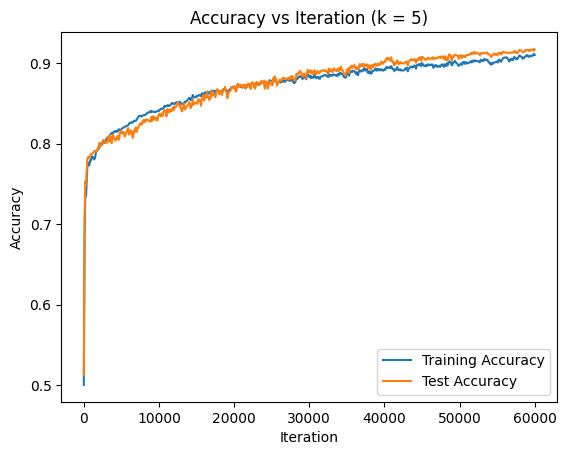


Training with k = 40
Iteration 0: Training accuracy 0.5151333333333333, test accuracy 0.5124 and Training loss 0.6931573324385174
Iteration 100: Training accuracy 0.6717333333333333, Test accuracy 0.6966 and Training loss 0.6917457785632445
Iteration 200: Training accuracy 0.7155166666666667, Test accuracy 0.7341 and Training loss 0.6898439537921688
Iteration 300: Training accuracy 0.6809666666666667, Test accuracy 0.7062 and Training loss 0.6877480396687119
Iteration 400: Training accuracy 0.6894, Test accuracy 0.7154 and Training loss 0.6853214655389898
Iteration 500: Training accuracy 0.6984166666666667, Test accuracy 0.7218 and Training loss 0.6831562482839315
Iteration 600: Training accuracy 0.6994833333333333, Test accuracy 0.7239 and Training loss 0.6806596139552532
Iteration 700: Training accuracy 0.7041833333333334, Test accuracy 0.7298 and Training loss 0.6780739014723471
Iteration 800: Training accuracy 0.7195, Test accuracy 0.7418 and Training loss 0.6752733969414272
Itera

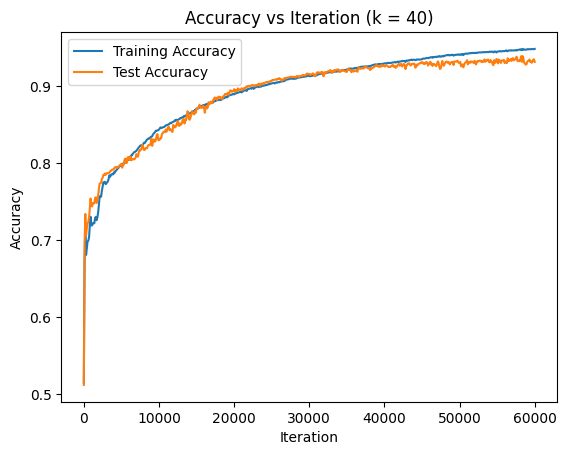


Training with k = 200
Iteration 0: Training accuracy 0.4655166666666667, test accuracy 0.4326 and Training loss 0.6931951249217263
Iteration 100: Training accuracy 0.5067833333333334, Test accuracy 0.5114 and Training loss 0.6930107208267342
Iteration 200: Training accuracy 0.5447, Test accuracy 0.5676 and Training loss 0.6928054238751753
Iteration 300: Training accuracy 0.6014166666666667, Test accuracy 0.6256 and Training loss 0.6926040229165052
Iteration 400: Training accuracy 0.6552666666666667, Test accuracy 0.6814 and Training loss 0.6923890072993393
Iteration 500: Training accuracy 0.6846, Test accuracy 0.7025 and Training loss 0.692152314333421
Iteration 600: Training accuracy 0.7308, Test accuracy 0.7395 and Training loss 0.6918982901423401
Iteration 700: Training accuracy 0.7306833333333334, Test accuracy 0.7382 and Training loss 0.6915734153867416
Iteration 800: Training accuracy 0.7485, Test accuracy 0.7525 and Training loss 0.6912444464064825
Iteration 900: Training accur

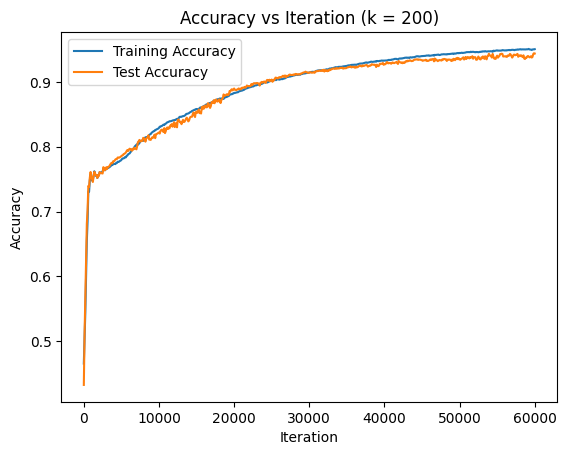

In [ ]:
def solution4():
    x_train, y_train, x_test, y_test = load_data()
    k_values = [5, 40, 200]
    learning_rate = 0.0005
    epochs = 10
    b_size = 10
    output_index = 100

    for k in k_values:
        print(f"\nTraining with k = {k}")
        train_accuracy, test_accuracy, train_loss, test_loss, W, v = train_logistic_loss(x_train, y_train, x_test, y_test, k, epochs, b_size, learning_rate, output_index)

        print(f"Final test accuracy for k = {k}: {test_accuracy[-1]}")

        plt.plot(range(0, (epochs * (x_train.shape[0] // b_size)) + output_index, output_index), train_accuracy, label="Training Accuracy")
        plt.plot(range(0, (epochs * (x_train.shape[0] // b_size)) + output_index, output_index), test_accuracy, label="Test Accuracy")
        plt.xlabel("Iteration")
        plt.ylabel("Accuracy")
        plt.title(f"Accuracy vs Iteration (k = {k})")
        plt.legend()
        plt.show()


solution4()




Asnwer4) The number of nodes in a neural network can have a significant impact on its accuracy. In general, more nodes will lead to higher accuracy, but it is important to note that there is a point of diminishing returns.

In the above output, we can see that the final test accuracy for K=5 is 91%, for K=40 is 93%, and for K=200 is 94.3%. This shows that there is a significant increase in accuracy from K=5 to K=40, but the increase in accuracy from K=40 to K=200 is much smaller.

This is because the neural network has already learned most of the patterns in the data with 40 nodes. Adding more nodes does not significantly improve the accuracy of the model, but it does increase the training time.

It is important to note that the number of nodes that is optimal for a particular problem will vary depending on the complexity of the problem and the size of the dataset.

**Question5) 2 pts) Comment on the difference between linear model and neural net. Comment on the differences
between logistic and quadratic loss in terms of optimization and test/train accuracy.**

Answer5) The difference between a linear model and a neural net:

Linear models are simpler models that involve a direct relationship between input features and output. They perform well for simple models where the data is linearly separable, but they fail for complex models where the data is not linearly separable. Neural networks are more powerful models that can learn complex patterns in data. They perform well for data that is not linearly separable.

In our assignment, we can see that the maximum accuracy for the linear model is 80%, while the accuracy for the neural network is 94%. However, neural networks require more time to train because of the increased number of parameters and the complexity of the optimization process, which involves backpropagation and gradient descent.

The difference between a Logistic and quadratic loss:

Logistic loss and quadratic loss are two different loss functions that can be used for classification problems. Logistic loss converges faster than quadratic loss for classification problems, as it penalizes misclassified instances more heavily. This drives the model to focus on correctly classifying those instances. Logistic loss also gives better performance in terms of test/train accuracy for classification tasks. Quadratic loss is more suitable for regression problems.

In our assignment, we can see that logistic loss performs better than quadratic loss for both training and test data. Quadratic loss accuracy is not consistent and changes a lot for each iteration.